## Example from François Chollet Book: Deep Learning with Python

In [1]:
from tensorflow.keras.datasets import mnist


2025-08-02 14:40:11.498042: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-02 14:40:12.561858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754160013.635160   33641 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754160014.059967   33641 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-02 14:40:16.573846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
type(train_images)

numpy.ndarray

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Training

In [23]:
# Network Architecture 
from tensorflow import keras 
from tensorflow.keras import layers 
model = keras.Sequential([ 
    layers.Dense(512, activation="relu"), 
    layers.Dense(10, activation="softmax") 
])

In [11]:
# The compilation step
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

I0000 00:00:1749150036.099285   37804 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [12]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype("float32") / 255

In [13]:
# “Fitting” the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


I0000 00:00:1749150115.687912   76580 service.cc:148] XLA service 0x7136200038d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749150115.688750   76580 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-06-05 15:01:55.881727: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749150116.187531   76580 cuda_dnn.cc:529] Loaded cuDNN version 90501


173/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.6339

I0000 00:00:1749150118.090986   76580 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.4299
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9653 - loss: 0.1153
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.9791 - loss: 0.0692
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9848 - loss: 0.0503
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9896 - loss: 0.0372


In [14]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


array([2.8869869e-07, 4.3751629e-09, 4.3015818e-05, 3.0474723e-05,
       5.2733807e-12, 5.9136478e-09, 1.0795450e-12, 9.9992371e-01,
       2.0260950e-07, 2.3211280e-06], dtype=float32)

In [15]:
predictions[0].argmax()

np.int64(7)

In [16]:
predictions[0][7]

np.float32(0.9999237)

In [17]:
test_labels[0]

np.uint8(7)

In [18]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9746 - loss: 0.0807
test_acc: 0.9782999753952026


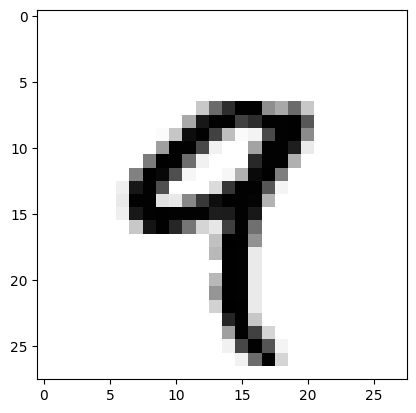

In [20]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Displaying the fourth digit
import matplotlib.pyplot as plt 
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [21]:
train_labels[4]

np.uint8(9)

### CNNs Model

In [29]:
# Instantiating a small convnet
from tensorflow import keras 
from tensorflow.keras import layers 
inputs = keras.Input(shape=(28, 28, 1)) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) 
x = layers.Flatten()(x) 
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

In [30]:
# Displaying the model’s summary
from tensorflow.keras.datasets import mnist  
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype("float32") / 255 
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]) 
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8885 - loss: 0.3610
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9868 - loss: 0.0444
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9902 - loss: 0.0313
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9932 - loss: 0.0213
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9943 - loss: 0.0177


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9872 - loss: 0.0327
Test accuracy: 0.991
